In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [ ]:
def rmse(y_true, y_pred):
  return np.sqrt(mean_squared_error(y_true, y_pred))

In [ ]:
train = pd.read_csv('diamonds_train.csv')
test = pd.read_csv('diamonds_test.csv')

In [ ]:
train.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.21,Ideal,H,VS2,63.0,57.0,6.73,6.70,4.23,6134
1,1,0.28,Very Good,D,VVS2,64.0,56.0,4.14,4.17,2.66,532
2,2,0.42,Premium,F,VS1,61.2,58.0,4.86,4.82,2.96,1103
3,3,0.26,Ideal,H,IF,61.1,57.0,4.16,4.12,2.53,600
4,4,1.10,Good,G,SI1,63.4,57.0,6.52,6.55,4.14,4997


In [ ]:
train.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
dtype: int64

In [ ]:
train.shape, test.shape

((40345, 11), (13449, 10))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


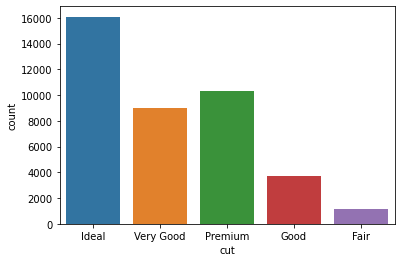

In [ ]:
sns.countplot(train.cut)

In [ ]:
train.groupby('cut').agg({'price': 'mean'})

,price
cut,
Fair,4377.750422
Good,3904.176232
Ideal,3449.843816
Premium,4583.088016
Very Good,3963.129150


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


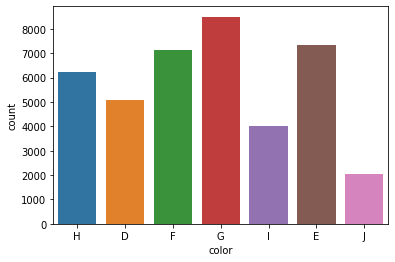

In [ ]:
sns.countplot(train.color)

In [ ]:
train.groupby('color').agg({'price': 'mean'}).sort_values('price', ascending=False)

,price
color,
J,5330.246804
I,5044.441959
H,4438.723933
G,3984.466761
F,3733.193128
D,3198.432203
E,3101.672698


In [ ]:
train.price.max()

18818

In [ ]:
train.query('cut=="Fair" & color=="J"').sort_values('price', ascending=False)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
29122,29122,2.40,Fair,J,SI2,65.4,56.0,8.35,8.29,5.44,15824
39813,39813,2.52,Fair,J,SI2,65.1,56.0,8.51,8.43,5.51,15776
39121,39121,2.06,Fair,J,VS1,64.6,58.0,7.91,8.04,5.15,14750
39388,39388,2.01,Fair,J,VS1,66.6,54.0,7.76,7.92,5.22,14402
18293,18293,2.01,Fair,J,VS2,64.9,60.0,7.82,7.78,5.06,13744
...,...,...,...,...,...,...,...,...,...,...,...
34832,34832,0.85,Fair,J,I1,65.5,59.0,5.95,5.82,3.86,1334
18613,18613,0.70,Fair,J,I1,64.7,59.0,5.59,5.50,3.59,1066
34218,34218,0.51,Fair,J,VS2,65.3,55.0,4.97,4.96,3.24,996
20428,20428,0.50,Fair,J,VS1,66.8,57.0,4.89,4.84,3.25,949


carat corr with price. If cut== Fair, color=J. It`s the best cut ant color


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


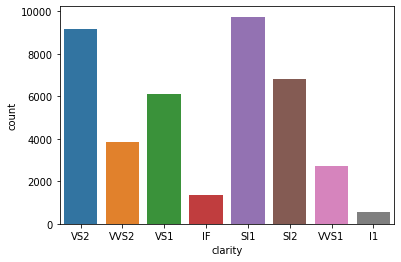

In [ ]:
sns.countplot(train.clarity)

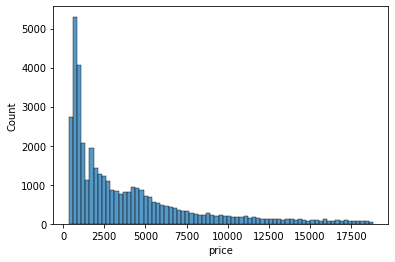

In [ ]:
sns.histplot(train.price)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


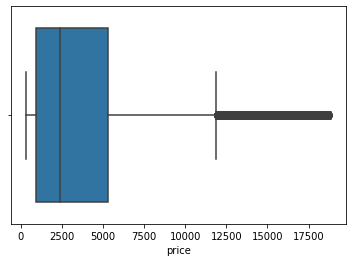

In [ ]:
sns.boxplot(train.price)

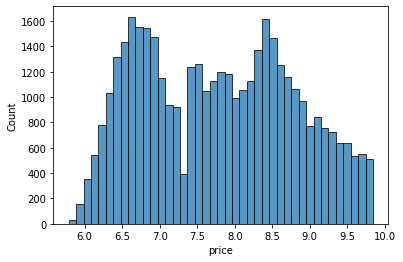

In [ ]:
sns.histplot(np.log(train.price))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


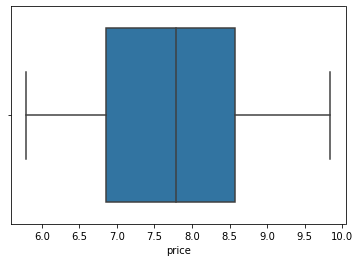

In [ ]:
sns.boxplot(np.log(train.price))

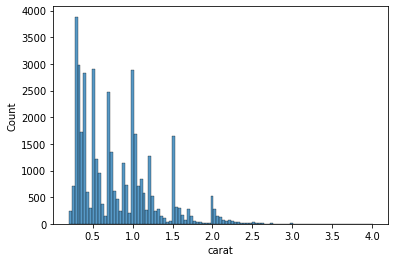

In [ ]:
sns.histplot(train.carat)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


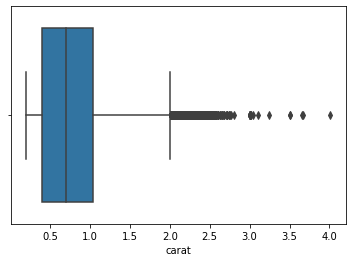

In [ ]:
sns.boxplot(train.carat)

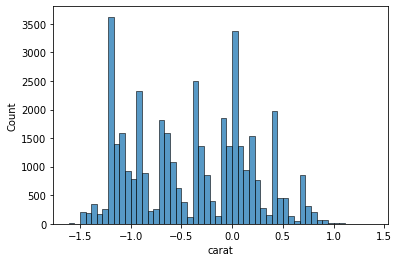

In [ ]:
sns.histplot(np.log(train.carat))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


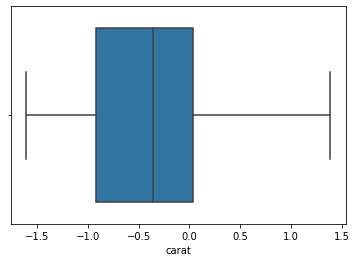

In [ ]:
sns.boxplot(np.log(train.carat))

In [ ]:
train.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.190620,Ideal,H,VS2,63.0,57.0,6.73,6.70,4.23,6134
1,1,-1.272966,Very Good,D,VVS2,64.0,56.0,4.14,4.17,2.66,532
2,2,-0.867501,Premium,F,VS1,61.2,58.0,4.86,4.82,2.96,1103
3,3,-1.347074,Ideal,H,IF,61.1,57.0,4.16,4.12,2.53,600
4,4,0.095310,Good,G,SI1,63.4,57.0,6.52,6.55,4.14,4997


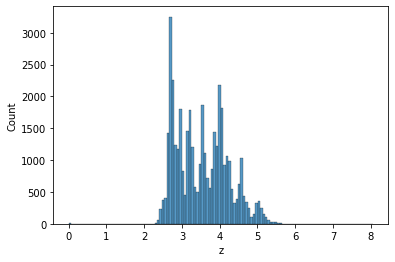

In [ ]:
sns.histplot(train.z)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


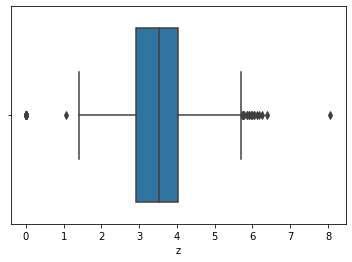

In [ ]:
sns.boxplot(train.z)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


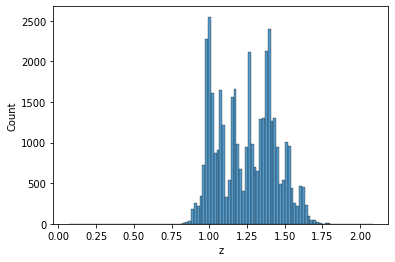

In [ ]:
sns.histplot(np.log(train.z))

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


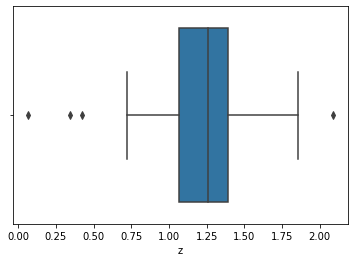

In [ ]:
sns.boxplot(np.log(train.z))

In [ ]:
train.carat = np.log(train.carat)
train.x = np.log(train.x)
train.y = np.log(train.y)
train.drop(train.query('y>3').index, inplace=True)
train.z = np.log(train.z)
train.drop(train.query('z>2 | z<0.6').index, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
test.x = np.log(test.x)
test.y = np.log(test.y)
test.z = np.log(test.z)
test.carat = np.log(test.carat)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
le = LabelEncoder()
train.cut = le.fit_transform(train.cut)
test.cut = le.transform(test.cut)
train.color = le.fit_transform(train.color)
test.color = le.transform(test.color)
train.clarity = le.fit_transform(train.clarity)
test.clarity = le.transform(test.clarity)

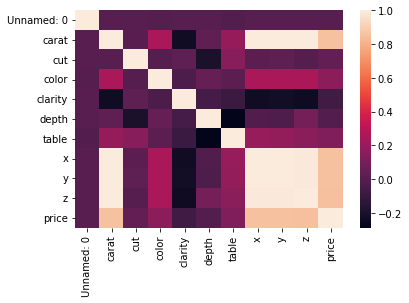

In [ ]:
sns.heatmap(train.corr())

In [ ]:
X = train.drop(['price', 'Unnamed: 0'], axis=1)
y = train.price

In [ ]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=17)

In [ ]:
linear = LinearRegression()
linear.fit(X_train, np.log(y_train))
rmse(y_test, np.exp(linear.predict(X_test)))

1230.3646622352735

In [ ]:
sas = pd.read_csv('sample_submission.csv')

In [ ]:
sas.price = np.exp(best_cb.predict(test.drop('Unnamed: 0',axis=1)))

In [ ]:
sas.to_csv('5.csv',index=False)

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 24 kB/s 


In [ ]:
from catboost import CatBoostRegressor

cb = CatBoostRegressor(verbose = 100)

cb.fit(X, np.log(y))

Learning rate set to 0.073427
0:	learn: 0.9462389	total: 10.6ms	remaining: 10.6s
100:	learn: 0.1113120	total: 713ms	remaining: 6.34s
200:	learn: 0.0973552	total: 1.38s	remaining: 5.5s
300:	learn: 0.0918001	total: 2.05s	remaining: 4.76s
400:	learn: 0.0882924	total: 2.72s	remaining: 4.06s
500:	learn: 0.0862739	total: 3.36s	remaining: 3.35s
600:	learn: 0.0845792	total: 4.02s	remaining: 2.67s
700:	learn: 0.0832770	total: 4.68s	remaining: 2s
800:	learn: 0.0821627	total: 5.33s	remaining: 1.32s
900:	learn: 0.0812134	total: 6s	remaining: 660ms
999:	learn: 0.0803085	total: 6.66s	remaining: 0us


In [ ]:
cb = CatBoostRegressor()
gr_cb = GridSearchCV(cb, {'depth'         : [6,8,10, 12, 15, 18],
                  'learning_rate' : [0.01, 0.05, 0.1],
                  'iterations'    : [30, 50, 100, 150, 200, 300]
                 }, n_jobs=-1, cv=5)
gr_cb.fit(X_train, np.log(y_train))
rmse(y_test, np.exp(gr_cb.predict(X_test)))


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


0:	learn: 0.9188935	total: 38.5ms	remaining: 11.5s
1:	learn: 0.8359345	total: 73.9ms	remaining: 11s
2:	learn: 0.7585450	total: 143ms	remaining: 14.1s
3:	learn: 0.6889613	total: 210ms	remaining: 15.5s
4:	learn: 0.6256039	total: 279ms	remaining: 16.4s
5:	learn: 0.5714141	total: 345ms	remaining: 16.9s
6:	learn: 0.5216567	total: 411ms	remaining: 17.2s
7:	learn: 0.4768570	total: 478ms	remaining: 17.4s
8:	learn: 0.4357469	total: 546ms	remaining: 17.7s
9:	learn: 0.4003638	total: 568ms	remaining: 16.5s
10:	learn: 0.3684958	total: 632ms	remaining: 16.6s
11:	learn: 0.3397827	total: 699ms	remaining: 16.8s
12:	learn: 0.3140407	total: 770ms	remaining: 17s
13:	learn: 0.2904992	total: 835ms	remaining: 17.1s
14:	learn: 0.2684375	total: 900ms	remaining: 17.1s
15:	learn: 0.2500536	total: 968ms	remaining: 17.2s
16:	learn: 0.2339230	total: 1.03s	remaining: 17.2s
17:	learn: 0.2184734	total: 1.11s	remaining: 17.3s
18:	learn: 0.2044195	total: 1.17s	remaining: 17.4s
19:	learn: 0.1934589	total: 1.24s	remaining

538.3292502428183

In [ ]:
best_cb = gr_cb.best_estimator_
best_cb.fit(X, np.log(y))

0:	learn: 0.9204000	total: 40.8ms	remaining: 12.2s
1:	learn: 0.8357497	total: 119ms	remaining: 17.7s
2:	learn: 0.7587684	total: 190ms	remaining: 18.8s
3:	learn: 0.6910437	total: 264ms	remaining: 19.5s
4:	learn: 0.6295452	total: 334ms	remaining: 19.7s
5:	learn: 0.5750687	total: 359ms	remaining: 17.6s
6:	learn: 0.5251661	total: 434ms	remaining: 18.2s
7:	learn: 0.4785359	total: 519ms	remaining: 18.9s
8:	learn: 0.4379460	total: 590ms	remaining: 19.1s
9:	learn: 0.4010586	total: 667ms	remaining: 19.3s
10:	learn: 0.3681794	total: 742ms	remaining: 19.5s
11:	learn: 0.3380008	total: 818ms	remaining: 19.6s
12:	learn: 0.3122733	total: 892ms	remaining: 19.7s
13:	learn: 0.2884015	total: 967ms	remaining: 19.8s
14:	learn: 0.2672588	total: 1.04s	remaining: 19.8s
15:	learn: 0.2493593	total: 1.11s	remaining: 19.8s
16:	learn: 0.2323621	total: 1.19s	remaining: 19.8s
17:	learn: 0.2162120	total: 1.26s	remaining: 19.7s
18:	learn: 0.2027557	total: 1.33s	remaining: 19.7s
19:	learn: 0.1911531	total: 1.41s	remain

In [ ]:
gr_cb.best_params_

{'depth': 12, 'iterations': 300, 'learning_rate': 0.1}